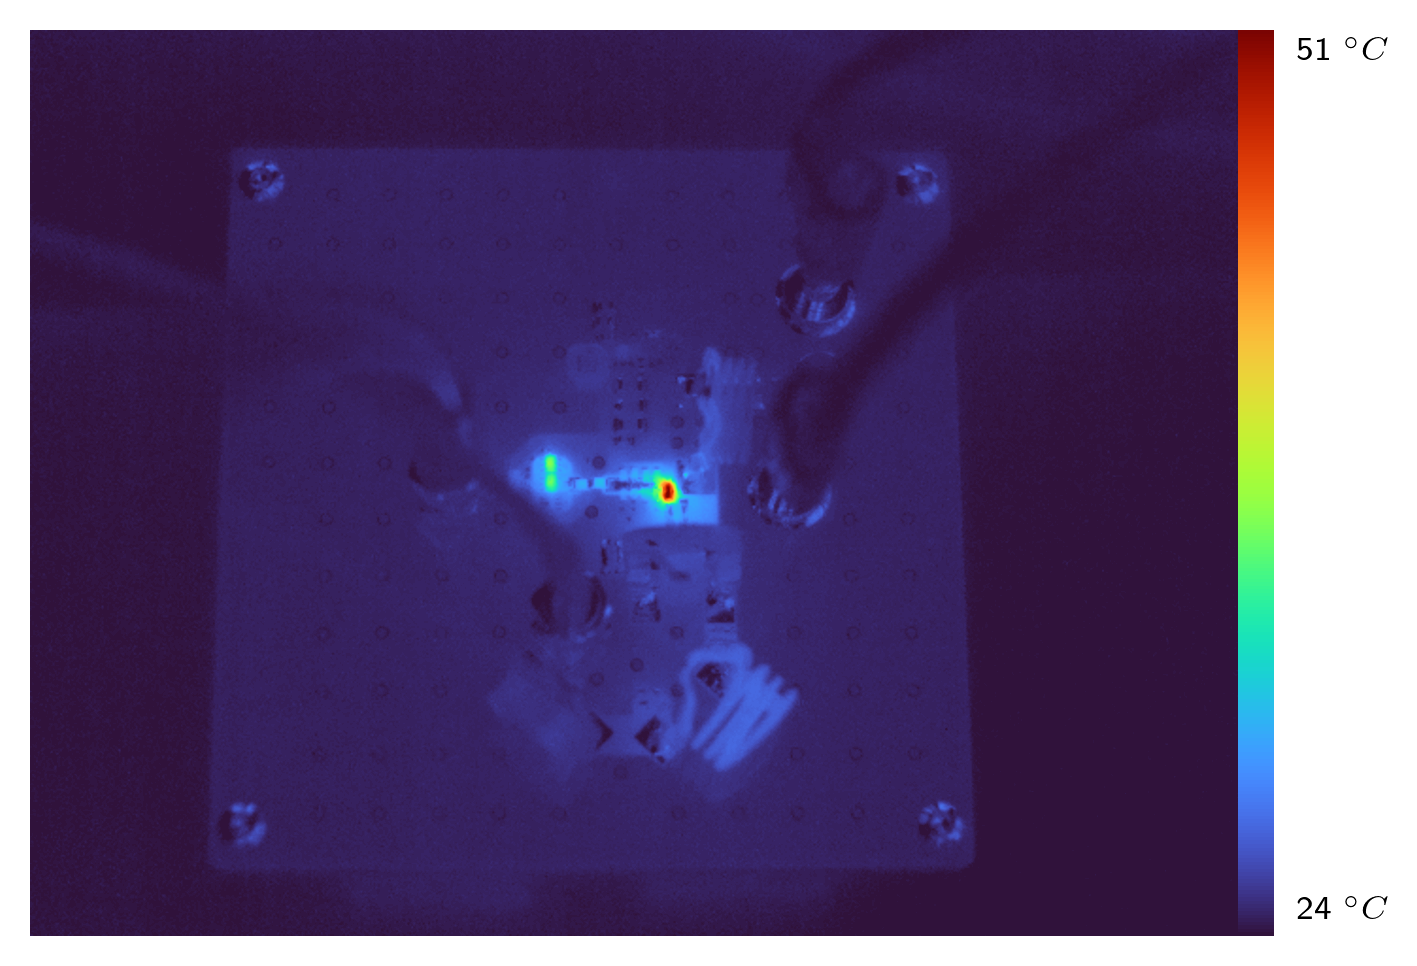

In [25]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from numpy import genfromtxt
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['text.usetex'] = True

scale = 0.03
with open('thermal_pixels.csv', 'r', encoding='utf-8-sig') as f: 
    data = np.genfromtxt(f, dtype=float, delimiter=',')
maxtemp = np.max(data)
mintemp = np.min(data) 
data = (data - mintemp)
delta = maxtemp - mintemp

# px = 1/plt.rcParams['figure.dpi']  # pixel in inches
fig = plt.figure()
fig.set_dpi(300)
ax = fig.add_subplot(1,1,1)
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False, which='both')
ax.set_yticklabels([])
ax.set_xticklabels([])
pt = ax.imshow(data, cmap='turbo', interpolation='catrom', norm=None, vmin=1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0)
cb = plt.colorbar(pt, cax=cax, aspect=30, pad=0, 
                  spacing='proportional', ticks=[scale*delta+1,(1-scale+0.01)*delta])
cb.outline.set_color('none')
cb.outline.set_linewidth(0.01)
cb.ax.tick_params(labelcolor='k', top=False, bottom=False, 
                  left=False, right=False, which='both',
                 labelsize=8, pad=2)
cb.ax.set_yticklabels(['24 ' + r'\(^{\circ}C\)', '51 ' + r'\(^{\circ}C\)'])
plt.savefig('GaN_thermal.pdf', bbox_inches='tight', pad_inches = 0)